In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


In [33]:
train_df = pd.read_csv('Training_set.csv')
test_df = pd.read_csv('Testing_set.csv')

print("Train columns:", train_df.columns)
print("Test columns:", test_df.columns)

Train columns: Index(['filename', 'label'], dtype='object')
Test columns: Index(['filename'], dtype='object')


In [34]:
train_df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [35]:
test_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train/',
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='train/',
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='test/',
    x_col='filename',
    y_col=None,
    target_size=(128, 128),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.
Found 2786 validated image filenames.


In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\Nandhakumar\anaconda3\envs\nk\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 75)             │         9,675 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,314,315 (12.64 MB)

 Trainable params: 3,314,315 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1
)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 189ms/step - accuracy: 0.0748 - loss: 3.9588 - val_accuracy: 0.2340 - val_loss: 3.1626
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.2638 - loss: 2.8487 - val_accuracy: 0.3749 - val_loss: 2.3131
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 183ms/step - accuracy: 0.4221 - loss: 2.1491 - val_accuracy: 0.4480 - val_loss: 2.0878
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 181ms/step - accuracy: 0.5456 - loss: 1.6381 - val_accuracy: 0.5181 - val_loss: 1.8373
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 178ms/step - accuracy: 0.6350 - loss: 1.2673 - val_accuracy: 0.5258 - val_loss: 1.8450
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 184ms/step - accuracy: 0.7171 - loss: 0.9526 - val_accuracy: 0.5142 - val_loss: 2.0003
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 180ms/step - accuracy: 0.7985 - loss: 0.6815 - val_accuracy: 0.5235 - val_loss: 2.0562
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 180ms/step - accuracy: 0.8346 - loss: 0

In [23]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.5420 - loss: 2.7584
Validation Accuracy: 0.5420


In [ ]:
print("Class mapping:", train_generator.class_indices)

Class mapping: {'ADONIS': 0, 'AFRICAN GIANT SWALLOWTAIL': 1, 'AMERICAN SNOOT': 2, 'AN 88': 3, 'APPOLLO': 4, 'ATALA': 5, 'BANDED ORANGE HELICONIAN': 6, 'BANDED PEACOCK': 7, 'BECKERS WHITE': 8, 'BLACK HAIRSTREAK': 9, 'BLUE MORPHO': 10, 'BLUE SPOTTED CROW': 11, 'BROWN SIPROETA': 12, 'CABBAGE WHITE': 13, 'CAIRNS BIRDWING': 14, 'CHECQUERED SKIPPER': 15, 'CHESTNUT': 16, 'CLEOPATRA': 17, 'CLODIUS PARNASSIAN': 18, 'CLOUDED SULPHUR': 19, 'COMMON BANDED AWL': 20, 'COMMON WOOD-NYMPH': 21, 'COPPER TAIL': 22, 'CRECENT': 23, 'CRIMSON PATCH': 24, 'DANAID EGGFLY': 25, 'EASTERN COMA': 26, 'EASTERN DAPPLE WHITE': 27, 'EASTERN PINE ELFIN': 28, 'ELBOWED PIERROT': 29, 'GOLD BANDED': 30, 'GREAT EGGFLY': 31, 'GREAT JAY': 32, 'GREEN CELLED CATTLEHEART': 33, 'GREY HAIRSTREAK': 34, 'INDRA SWALLOW': 35, 'IPHICLUS SISTER': 36, 'JULIA': 37, 'LARGE MARBLE': 38, 'MALACHITE': 39, 'MANGROVE SKIPPER': 40, 'MESTRA': 41, 'METALMARK': 42, 'MILBERTS TORTOISESHELL': 43, 'MONARCH': 44, 'MOURNING CLOAK': 45, 'ORANGE OAKLEAF':

In [29]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

labels = list(train_generator.class_indices.keys())
predicted_labels = [labels[i] for i in predicted_classes]

test_df['predicted_label'] = predicted_labels
test_df.to_csv('butterfly_predictions.csv', index=False)

print("Predictions saved to butterfly_predictions.csv")
print(test_df.head())


88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step
Predictions saved to butterfly_predictions.csv
      filename         predicted_label
0  Image_1.jpg             RED CRACKER
1  Image_2.jpg       BLUE SPOTTED CROW
2  Image_3.jpg      RED SPOTTED PURPLE
3  Image_4.jpg         IPHICLUS SISTER
4  Image_5.jpg  MILBERTS TORTOISESHELL


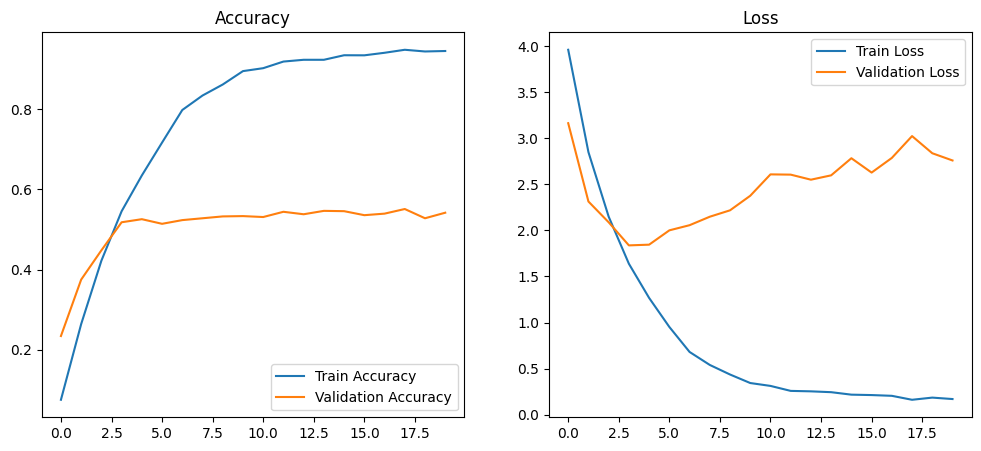

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [30]:
model.save("butterfly_cnn_model.h5")
print(" Model saved as butterfly_cnn_model.h5")


 Model saved as butterfly_cnn_model.h5


In [31]:
import pickle

with open("label_map.pkl", "wb") as f:
    pickle.dump(train_generator.class_indices, f)

print("Label map saved as label_map.pkl")


Label map saved as label_map.pkl
